# AIDI1009-25W: Neural Networks  
## Assignment #1: Dataset Exploration and Regression  
### Due Date: 18th Feb 2025  

**Student 1 Name:** Puja Shreshta (200573293)  
**Student 2 Name:** Tirth Doshi (200609650)  
**Student 3 Name:** Kelvin Krisna de Rodrigues Silva (2005885799)  


## 1. Goals
- Understand the fundamentals of Regression Analysis.
- Explore and clean real-world datasets.
- Apply Scikit-Learn for regression modeling.
- Evaluate models using MSE & RMSE.
- Perform feature selection and hyperparameter tuning.


## 2. Introduction
### Problem Statement
This assignment focuses on building a regression model to predict an engineering graduate’s **annual salary** based on academic performance, test scores, and other factors.

### Assumptions & Constraints
- Using `pandas`, `numpy`, `seaborn`, and `scikit-learn` for implementation.
- Missing values are handled via **imputation or column removal**.
- Data is scaled using **MinMaxScaler**.
- Performance evaluation metrics: **MSE & RMSE**.


## 3. Dataset Overview
### About the Dataset
The dataset contains **33 independent variables** and **1 target variable (Salary)**. It provides information about students’ academic backgrounds, domain knowledge, and soft skills.

### Key Features:
- **Salary**: Target variable (Annual salary in INR).
- **10percentage, 12percentage, CollegeGPA**: Academic performance.
- **Domain Knowledge Scores**: Scores in AMCAT modules (Quant, Logical, etc.).
- **Personality Traits**: Conscientiousness, Agreeableness, etc.

### Data Challenges:
- Some fields have **missing values**.
- Not all features **strongly correlate** with Salary.
- Some categories are **imbalanced**.

## Python Code For The Problem

### 2. Perform Data Exploration
- (a) Display the **first few records** in the dataset.
- (b) Display the **number of rows and columns** of the dataset.
- (c) Display the **dataset statistics** (min, max, mean, etc.).
- (d) Display the **Null values** of each feature.
- (e) Plot **graphs** of the data to assist in data exploration.

First Few Records:
        ID Gender         DOB  10percentage                       10board  \
0  604399      f  1990-10-22         87.80                          cbse   
1  988334      m  1990-05-15         57.00                          cbse   
2  301647      m  1989-08-21         77.33  maharashtra state board,pune   
3  582313      m  1991-05-04         84.30                          cbse   
4  339001      f  1990-10-30         82.00                          cbse   

   12graduation  12percentage                    12board  CollegeID  \
0          2009         84.00                       cbse       6920   
1          2010         64.50                       cbse       6624   
2          2007         85.17  amravati divisional board       9084   
3          2009         86.00                       cbse       8195   
4          2008         75.00                       cbse       4889   

   CollegeTier  ... MechanicalEngg ElectricalEngg  TelecomEngg  CivilEngg  \
0            1  ...

<Figure size 1800x1000 with 0 Axes>

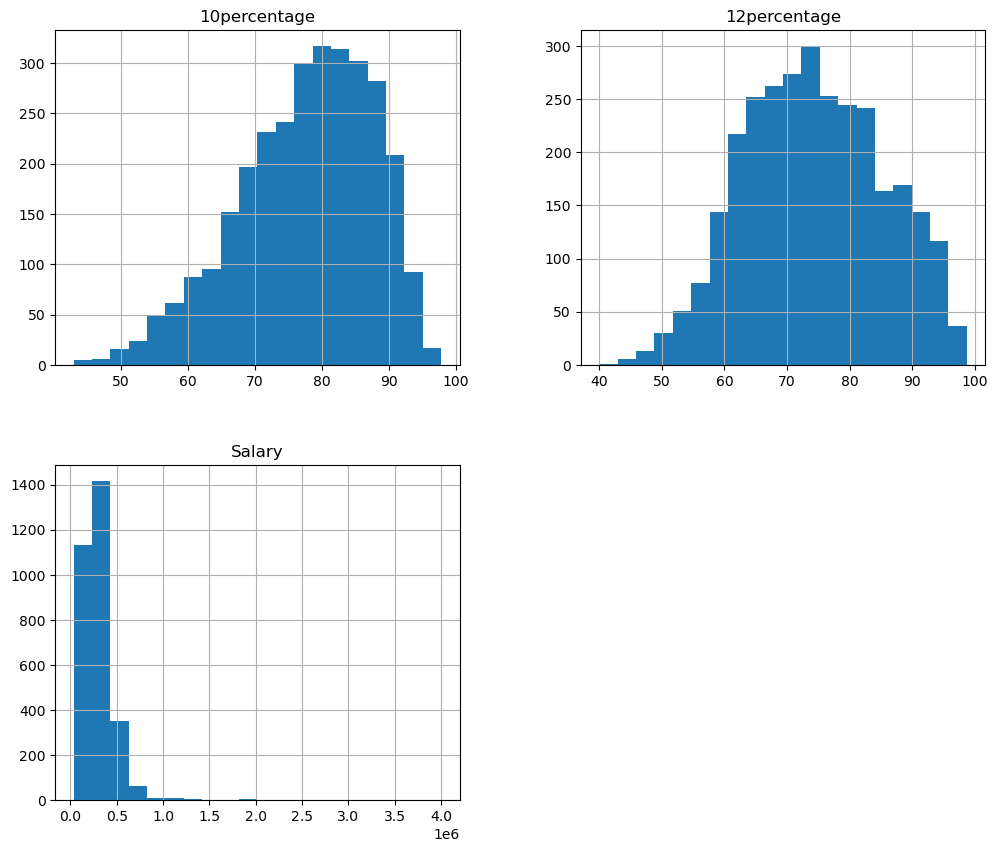

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso

file_path = "Engineering_graduate_salary.csv"
df = pd.read_csv(file_path)
 
print("First Few Records:\n", df.head())

print("\nDataset Shape:", df.shape)

print("\nDataset Statistics:\n", df.describe())

print("\nNull Values Per Column:\n", df.isnull().sum())

plt.figure(figsize=(18, 10))
df.hist(column=['10percentage', '12percentage', 'Salary'], bins=20, figsize=(12, 10))
plt.show()

### 3. Perform Initial Data Cleaning
- (a) **Delete columns** that mainly contain Null values.
- (b) **Remove duplicate columns** (obvious redundant information).
- (c) **Fill missing values** in numeric columns if necessary.
- (d) Display the **number of rows and columns** after cleaning.
- (e) Display the **features left** after cleaning.
- (f) Plot the **distribution (histogram)** of the following features:
  - **DOB**
  - **12percentage**

In [14]:
df = df.dropna(thresh=len(df) * 0.5, axis=1) 

df = df.loc[:, ~df.columns.duplicated()]

num_cols = df.select_dtypes(include=['number']).columns
imputer = SimpleImputer(strategy="mean")  
df[num_cols] = imputer.fit_transform(df[num_cols])

print("\nDataset Shape After Cleaning:", df.shape)

print("\nRemaining Features:\n", df.columns)



Dataset Shape After Cleaning: (2998, 34)

Remaining Features:
 Index(['ID', 'Gender', 'DOB', '10percentage', '10board', '12graduation',
       '12percentage', '12board', 'CollegeID', 'CollegeTier', 'Degree',
       'Specialization', 'collegeGPA', 'CollegeCityID', 'CollegeCityTier',
       'CollegeState', 'GraduationYear', 'English', 'Logical', 'Quant',
       'Domain', 'ComputerProgramming', 'ElectronicsAndSemicon',
       'ComputerScience', 'MechanicalEngg', 'ElectricalEngg', 'TelecomEngg',
       'CivilEngg', 'conscientiousness', 'agreeableness', 'extraversion',
       'nueroticism', 'openess_to_experience', 'Salary'],
      dtype='object')


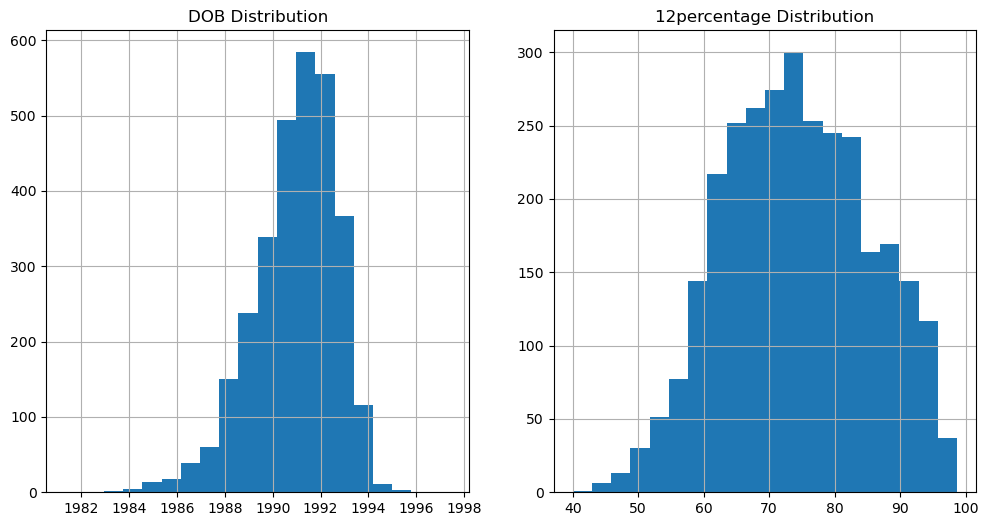

In [15]:
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
df['DOB'] = pd.to_datetime(df['DOB'], errors='coerce')
df['DOB'].hist(bins=20)
plt.title("DOB Distribution")

plt.subplot(1, 2, 2)
df['12percentage'].hist(bins=20)
plt.title("12percentage Distribution")

plt.show()


### 4. Analyze the Pairwise Relationship Between Features
- Use pairwise plots to visualize relationships between dataset features.

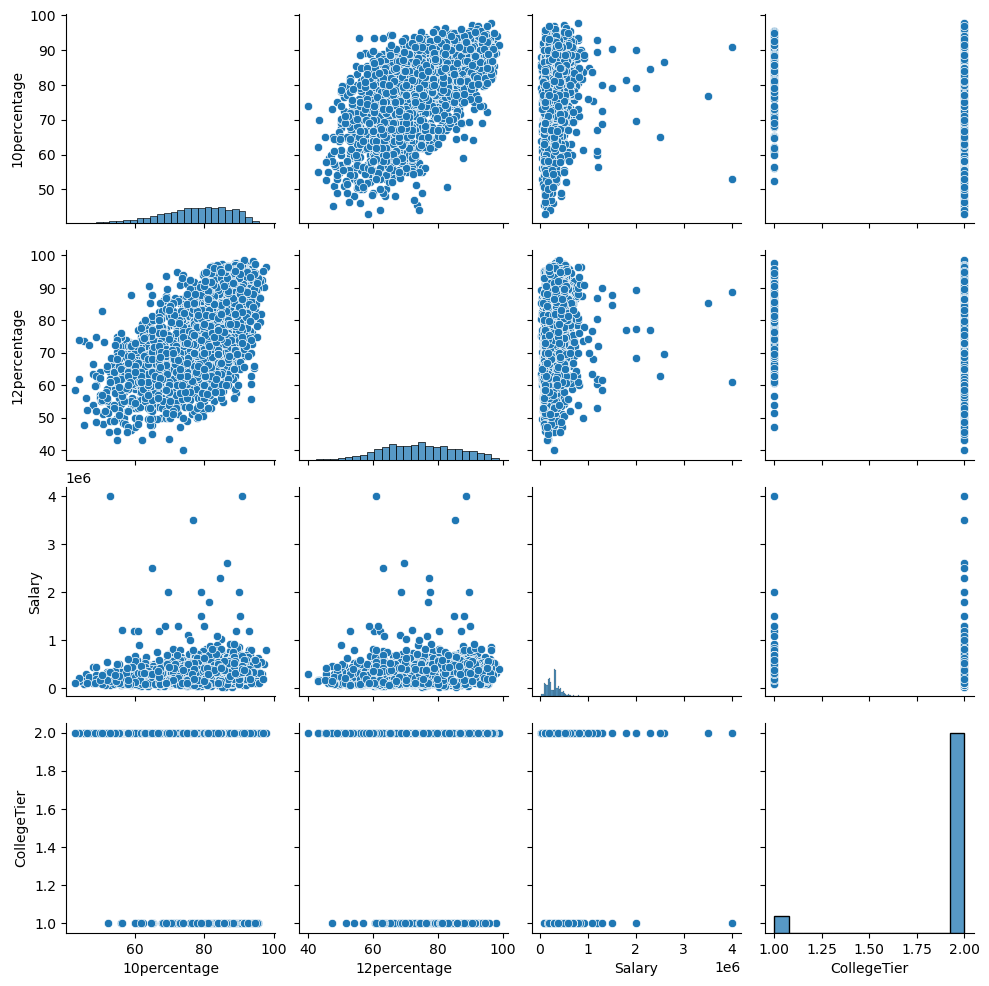

In [16]:
selected_features = ['10percentage', '12percentage', 'Salary', 'CollegeTier']
sns.pairplot(df[selected_features])
plt.show()

### 5. Plot the Correlation Heatmap
- Generate a **heatmap** from the pairwise correlation matrix.

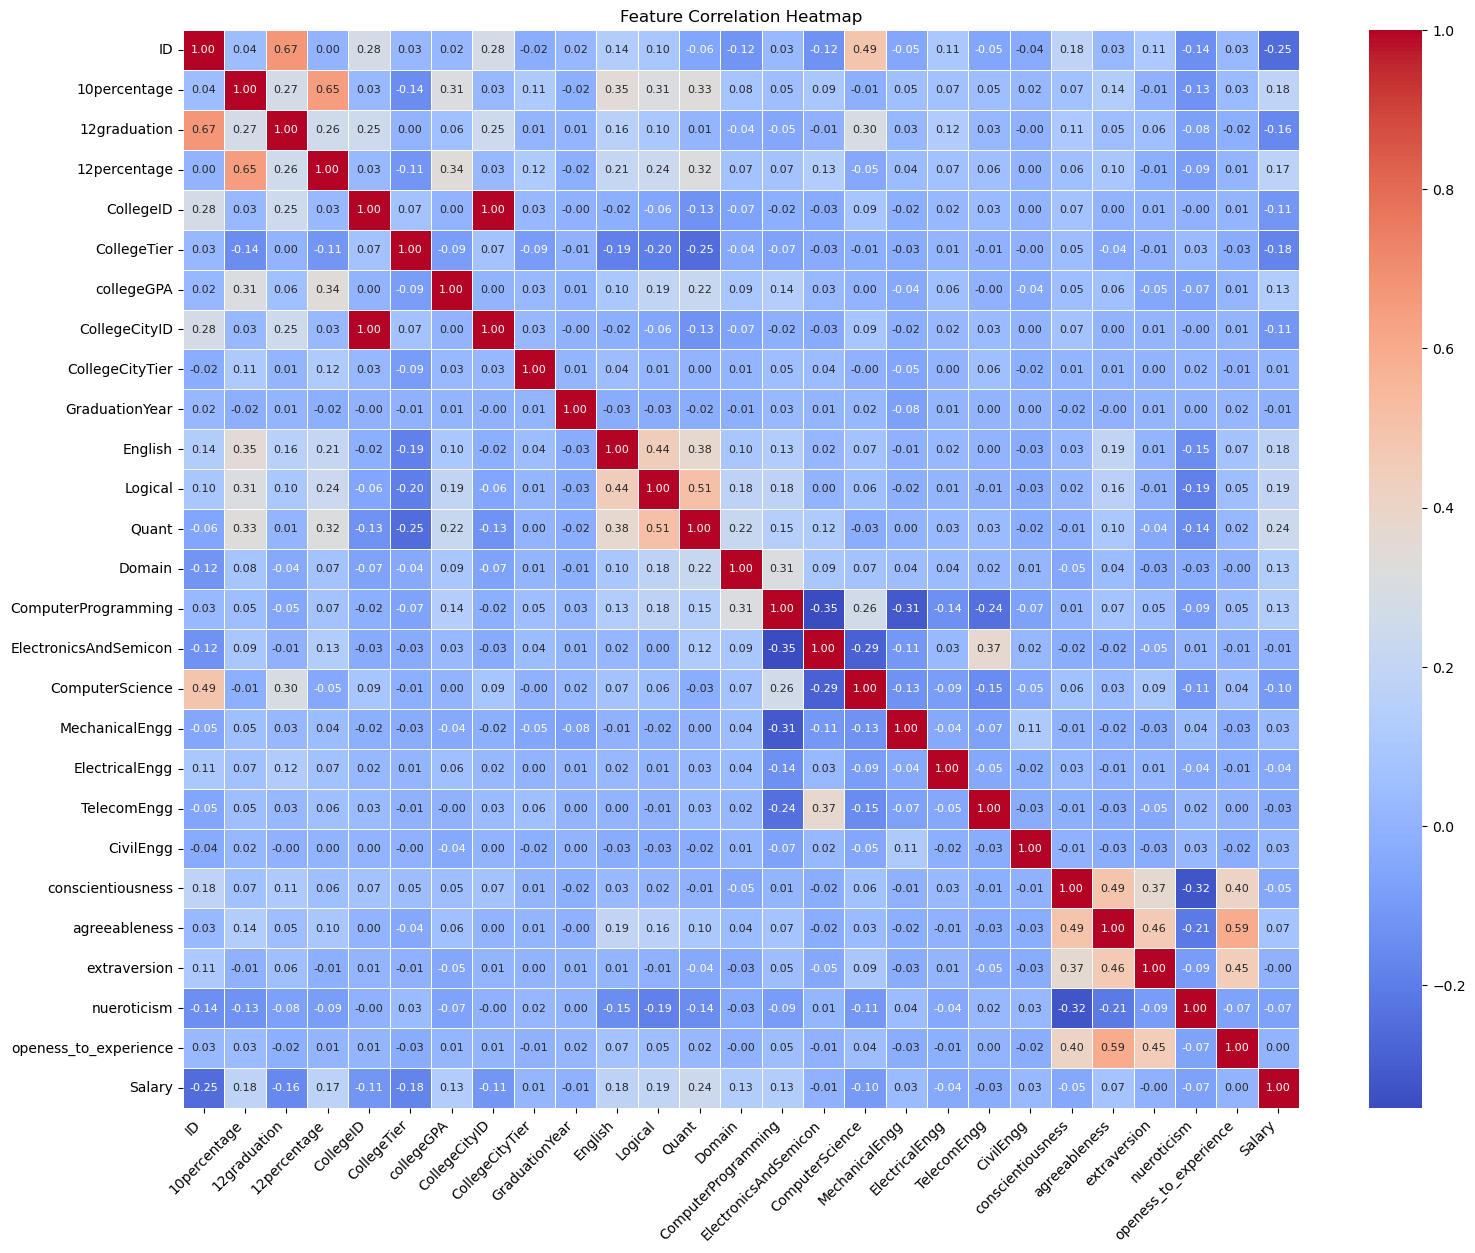

In [17]:
numeric_df = df.select_dtypes(include=['number'])
corr_matrix = numeric_df.corr()
plt.figure(figsize=(18, 14))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.6, annot_kws={"size": 8})
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.title("Feature Correlation Heatmap")
plt.show()

### 6. Perform Necessary Data Preprocessing (Transformation)
- (a) **Scale** values in numeric columns to a **(0,1) range** if needed.
- (b) **Encode categorical data** into **one-hot vectors**.
- (c) **Split the dataset** into **training, validation, and testing** sets.

In [18]:
scaler = MinMaxScaler()

df[num_cols] = scaler.fit_transform(df[num_cols])
df['Salary'] = scaler.fit_transform(df[['Salary']])

cat_cols = df.select_dtypes(include=['object']).columns
df = pd.get_dummies(df, columns=cat_cols, drop_first=True)

corr_matrix = df.corr()

top_features = corr_matrix["Salary"].abs().sort_values(ascending=False).index[1:10]
X = df[top_features]
y = df['Salary']

X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("\nDataset Shapes After Fixing:")
print("Training Set:", X_train.shape, y_train.shape)
print("Validation Set:", X_val.shape, y_val.shape)
print("Testing Set:", X_test.shape, y_test.shape)



Dataset Shapes After Fixing:
Training Set: (2098, 9) (2098,)
Validation Set: (450, 9) (450,)
Testing Set: (450, 9) (450,)


### 7. Train a Simple Linear Regression Model
- Use **Scikit-Learn's** `LinearRegression` model to perform regression.

### 8. Evaluate Model Performance
- Use only the features after cleaning to compute:
  - (a) **Mean Squared Error (MSE)**
  - (b) **Root Mean Squared Error (RMSE)**

In [19]:
model = LinearRegression()
model.fit(X_train, y_train)

y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

y_val_pred = scaler.inverse_transform(y_val_pred.reshape(-1, 1))
y_test_pred = scaler.inverse_transform(y_test_pred.reshape(-1, 1))
y_val = scaler.inverse_transform(y_val.values.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.values.reshape(-1, 1))

mse_val = mean_squared_error(y_val, y_val_pred)
rmse_val = np.sqrt(mse_val)

mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)

print("\nModel Performance Metrics After Fixing:")
print("Validation Set - MSE:", mse_val, "RMSE:", rmse_val)
print("Test Set - MSE:", mse_test, "RMSE:", rmse_test)


Model Performance Metrics After Fixing:
Validation Set - MSE: 0.001036280594967549 RMSE: 0.0321913124144939
Test Set - MSE: 0.0036753269500475853 RMSE: 0.06062447484347873


### 10. Perform Hyperparameter Tuning
- Tune model parameters using **GridSearchCV** and compare different models.

In [20]:
param_grid_lasso = {'alpha': [0.01, 0.1, 1, 10, 50, 100]}

lasso_model = Lasso()
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='neg_mean_squared_error')
grid_search_lasso.fit(X_train, y_train)

best_lasso = grid_search_lasso.best_estimator_

y_val_pred_lasso = best_lasso.predict(X_val)
y_test_pred_lasso = best_lasso.predict(X_test)

y_val_pred_lasso = scaler.inverse_transform(y_val_pred_lasso.reshape(-1, 1))
y_test_pred_lasso = scaler.inverse_transform(y_test_pred_lasso.reshape(-1, 1))
y_val = scaler.inverse_transform(y_val.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))

mse_val_lasso = mean_squared_error(y_val, y_val_pred_lasso)
rmse_val_lasso = np.sqrt(mse_val_lasso)

mse_test_lasso = mean_squared_error(y_test, y_test_pred_lasso)
rmse_test_lasso = np.sqrt(mse_test_lasso)

print("\nBest Hyperparameter for Lasso Regression:", grid_search_lasso.best_params_)
print("Validation Set - MSE:", mse_val_lasso, "RMSE:", rmse_val_lasso)
print("Test Set - MSE:", mse_test_lasso, "RMSE:", rmse_test_lasso)



Best Hyperparameter for Lasso Regression: {'alpha': 0.01}
Validation Set - MSE: 0.0015594708097316746 RMSE: 0.03949013560032017
Test Set - MSE: 0.004226605591259178 RMSE: 0.0650123495288332


### 9. Perform Feature Selection and Repeat Step 8
- **Select key features** and recompute **MSE & RMSE** for performance comparison.

In [21]:
model_after_selection = LinearRegression()
model_after_selection.fit(X_train, y_train)

y_test_pred_after_selection = model_after_selection.predict(X_test)
y_test_pred_after_selection = scaler.inverse_transform(y_test_pred_after_selection.reshape(-1, 1))
y_test = scaler.inverse_transform(y_test.reshape(-1, 1))  # ✅ Fix: Remove `.values`


mse_test_after_selection = mean_squared_error(y_test, y_test_pred_after_selection)
rmse_test_after_selection = np.sqrt(mse_test_after_selection)

print("\nAfter Feature Selection - Linear Regression Model:")
print("Test Set - MSE:", mse_test_after_selection, "RMSE:", rmse_test_after_selection)



After Feature Selection - Linear Regression Model:
Test Set - MSE: 0.0036753269500475853 RMSE: 0.06062447484347873


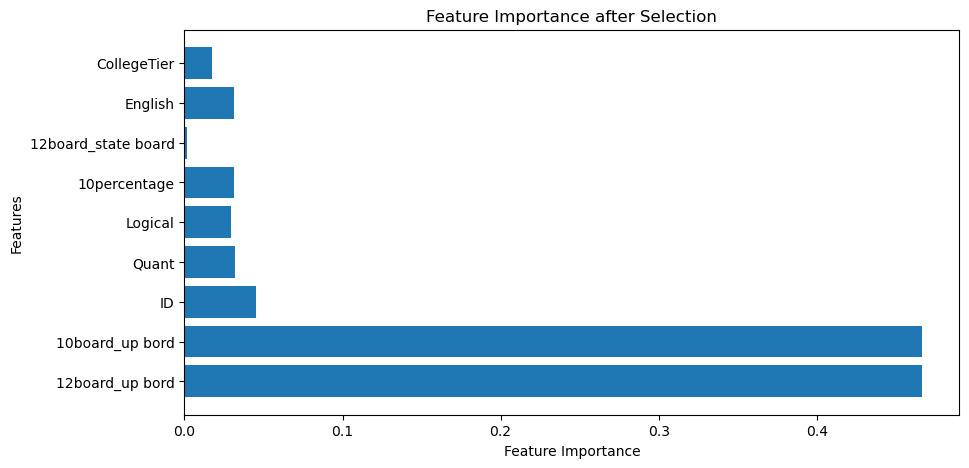

In [22]:
feature_importance = abs(model_after_selection.coef_)
plt.figure(figsize=(10, 5))
plt.barh(X_train.columns, feature_importance)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Feature Importance after Selection")
plt.show()
